<a href="https://colab.research.google.com/github/FedeRmrz/Spotify/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Federico Ramirez - Elizabeth Guevara

In [ ]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path de la carpeta donde tenemos los datos
folder = "/content/drive/MyDrive/Spotify/Canciones_Spotify.csv"

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el conjunto de datos
data = pd.read_csv(folder)

In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['target', 'song_title', 'artist'])
y = data['target']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

escala las características utilizando StandardScaler. Esto puede ser útil dependiendo de los modelos utilizados

In [ ]:
# Escalar las características (opcional, dependiendo de los modelos utilizados)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Se crean cuatro modelos de aprendizaje automático: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Árbol de Decisión y Naive Bayes
Cada uno de estos modelos se entrena más adelante

In [ ]:
# Construir modelos de Machine Learning
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

In [ ]:
models = [knn, svm, decision_tree, naive_bayes]
model_names = ["KNN", "SVM", "Decision Tree", "Naive Bayes"]

In [ ]:
# Almacenar métricas en listas
confusion_list = []
precision_list = []
recall_list = []
f1_list = []

In [ ]:
# Gráficos de entrenamiento
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    confusion_list.append(confusion)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

Se realiza una validación cruzada k-fold en cada modelo para evaluar su rendimiento
La métrica utilizada es la precisión

In [ ]:
# Realizar validación cruzada k-fold
k_fold = 5
scores_knn = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
scores_svm = cross_val_score(svm, X_train, y_train, cv=k_fold, scoring='accuracy')
scores_decision_tree = cross_val_score(decision_tree, X_train, y_train, cv=k_fold, scoring='accuracy')
scores_naive_bayes = cross_val_score(naive_bayes, X_train, y_train, cv=k_fold, scoring='accuracy')

In [ ]:
# Imprimir los resultados de la validación cruzada
print("KNN Accuracy: {:.2f} (+/- {:.2f})".format(scores_knn.mean(), scores_knn.std() * 2))
print("SVM Accuracy: {:.2f} (+/- {:.2f})".format(scores_svm.mean(), scores_svm.std() * 2))
print("Decision Tree Accuracy: {:.2f} (+/- {:.2f})".format(scores_decision_tree.mean(), scores_decision_tree.std() * 2))
print("Naive Bayes Accuracy: {:.2f} (+/- {:.2f})".format(scores_naive_bayes.mean(), scores_naive_bayes.std() * 2))

KNN Accuracy: 0.92 (+/- 0.02)
SVM Accuracy: 0.97 (+/- 0.02)
Decision Tree Accuracy: 1.00 (+/- 0.00)
Naive Bayes Accuracy: 0.96 (+/- 0.03)


Se crea un ensamble de modelos (VotingClassifier) combina los cuatro modelos utilizando un voto mayoritario (voting='hard')

In [ ]:
# Construir un ensamble de modelos (Votación mayoritaria)
ensemble = VotingClassifier(estimators=[('KNN', knn), ('SVM', svm), ('DecisionTree', decision_tree), ('NaiveBayes', naive_bayes)], voting='hard')

Se entrena el ensamble en el conjunto de entrenamiento

In [ ]:
# Entrenar el ensamble en el conjunto de entrenamiento
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()), ('SVM', SVC()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB())])

Se hacen predicciones en el conjunto de prueba utilizando el ensamble y se evalúa su rendimiento utilizando métricas como la matriz de confusión, precisión, recall y F1-Score

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = ensemble.predict(X_test)

In [ ]:
# Evaluar el rendimiento del ensamble
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Imprimir métricas de rendimiento
print("Matriz de Confusión:\n", confusion)
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Matriz de Confusión:
 [[204   2]
 [  7 191]]
Precisión: 0.99
Recall: 0.96
F1-Score: 0.98


##Graficos

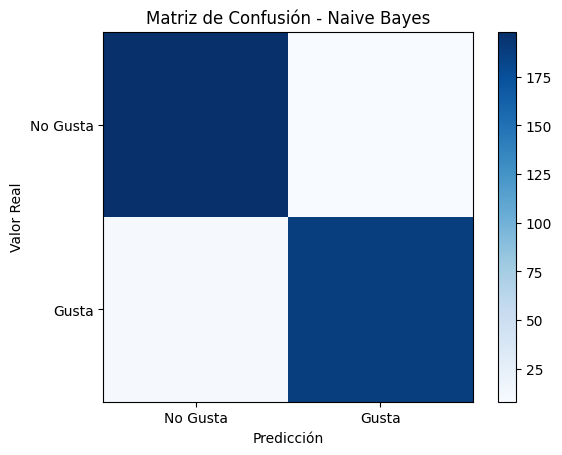

In [ ]:
# Crear un gráfico de matriz de confusión
plt.figure()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión - {model_name}")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["No Gusta", "Gusta"])
plt.yticks(tick_marks, ["No Gusta", "Gusta"])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

# Mostrar los gráficos
plt.show()

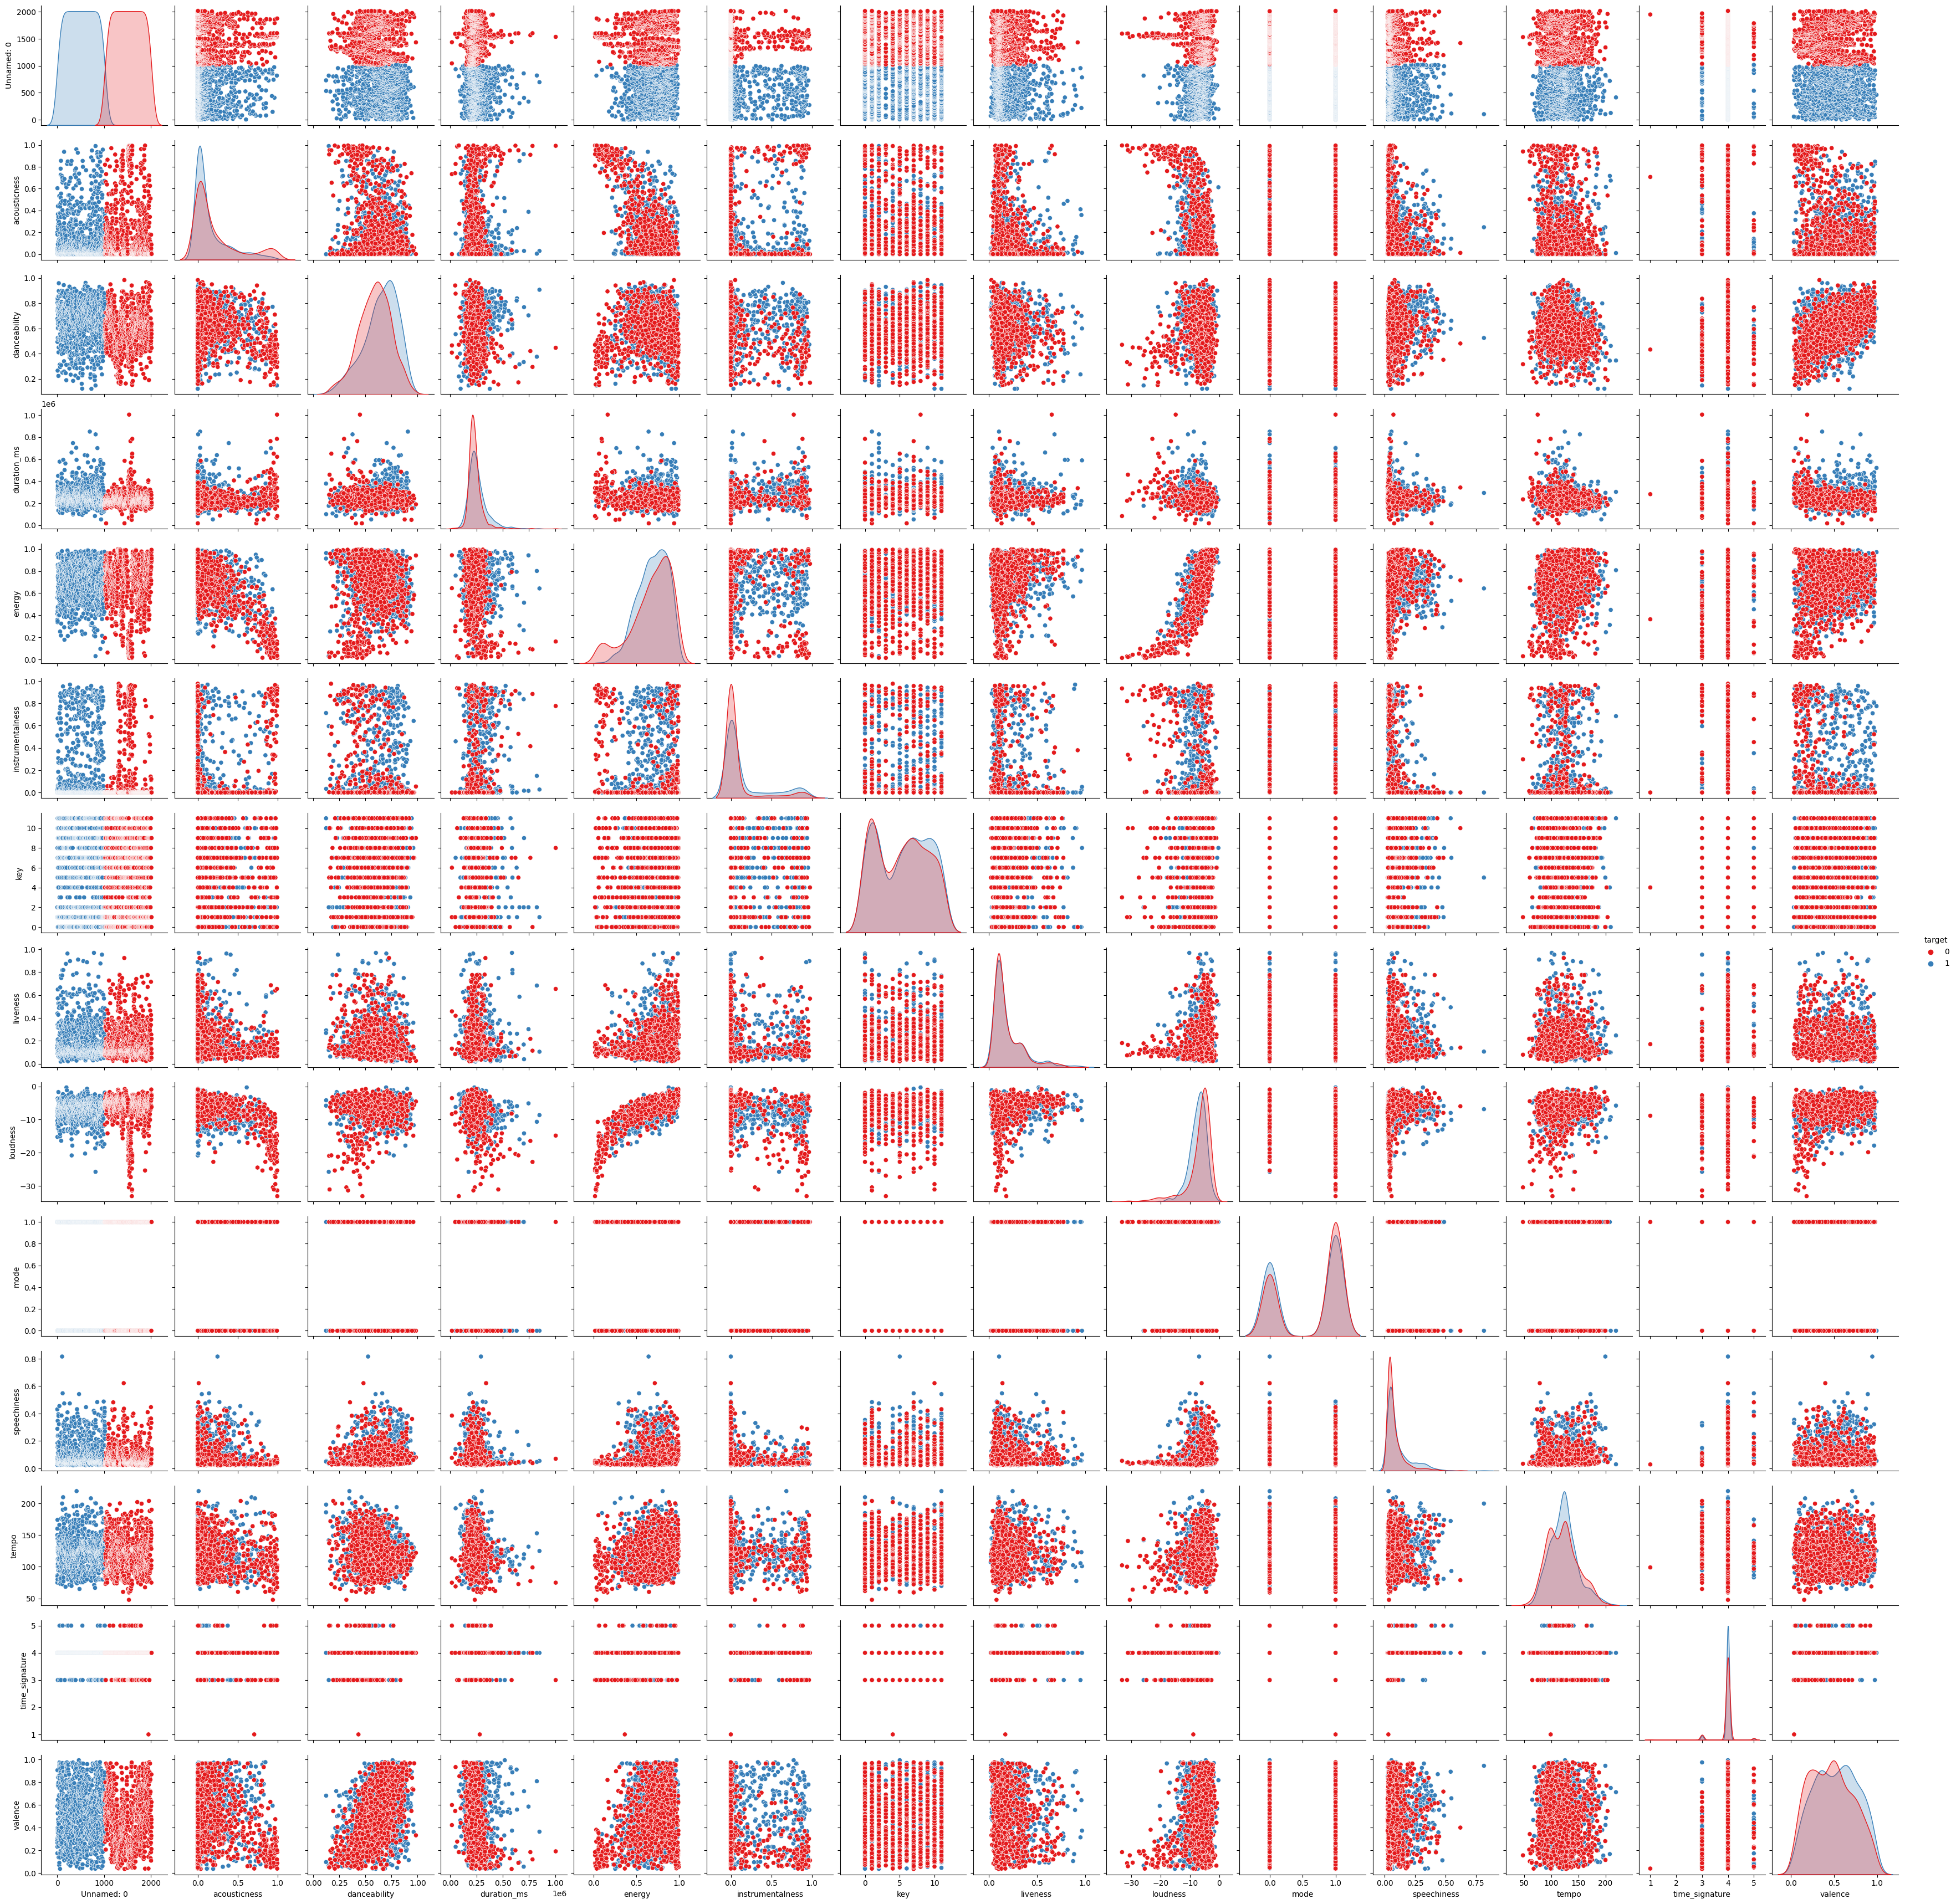

In [ ]:
# Utiliza sns.pairplot para crear una matriz de gráficos de dispersión
sns.pairplot(data, hue='target', palette='Set1')
plt.show()